In [87]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Model

In [108]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [106]:
import numpy as np

In [ ]:
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [79]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [83]:
type(mobile)

tensorflow.python.keras.engine.training.Model

In [72]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [67]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory='./data/train', target_size=(224,224), batch_size=29)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory='./data/validation', target_size=(224,224), batch_size=20)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory='./data/test', target_size=(224,224), batch_size=20, shuffle=False)

Found 2522 images belonging to 2 classes.
Found 392 images belonging to 2 classes.
Found 348 images belonging to 2 classes.


In [68]:
test_batches.class_indices

{'free': 0, 'full': 1}

In [80]:
x = mobile.layers[-6].output

In [81]:
output = Dense(units=2, activation='softmax')(x)

In [88]:
model = Model(inputs=mobile.input, outputs=output)

In [89]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [92]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics = ['accuracy'])

In [93]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [94]:
model.fit(x=train_batches, validation_data = valid_batches, epochs = 10, verbose = 2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 87 steps, validate for 20 steps
Epoch 1/10
87/87 - 741s - loss: 0.1547 - accuracy: 0.9429 - val_loss: 0.1403 - val_accuracy: 0.9490
Epoch 2/10
87/87 - 704s - loss: 0.0184 - accuracy: 0.9984 - val_loss: 0.0707 - val_accuracy: 0.9847
Epoch 3/10
87/87 - 725s - loss: 0.0067 - accuracy: 0.9996 - val_loss: 0.1310 - val_accuracy: 0.9286
Epoch 4/10
87/87 - 777s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.1058 - val_accuracy: 0.9515
Epoch 5/10
87/87 - 772s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1293 - val_accuracy: 0.9286
Epoch 6/10
87/87 - 761s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1289 - val_accuracy: 0.9311
Epoch 7/10
87/87 - 701s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1334 - val_accuracy: 0.9286
Epoch 8/10
87/87 - 701s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1470 - val_accuracy: 0.9209
Epoch 9/10
87/87 - 700s - loss: 8.4513e-04 - accuracy: 1.0000 - val_loss: 0.1368 - val_accuracy: 0.9235
Epoc

In [97]:
test_labels = test_batches.classes

In [98]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [99]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [104]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 74  10]
 [  1 263]]


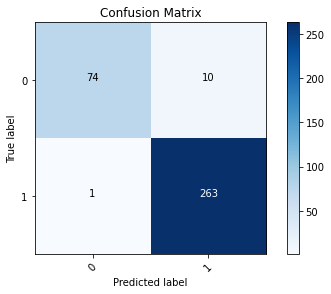

In [109]:
cm_plot_labels = ['0','1']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')